# Projet 1

In [1]:
import re
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
book =  open("LOTR_ReturnOfTheKing.txt").read()
book_chapters = re.split(r"_Chapter \w+_",book)[1:]

In [3]:
Characters = [["aragorn","strider","the heir of isildur","king of gondor"], 
              ["arwen", "queen of gondor","evenstar"],
              ["bill ferny"], ["bilbo"],["boromir"], 
              ["beregond"],["bergil"],["butterbur","barliman"],
              ["celeborn", "lord of lothlórien"],
              ["denethor","steward of gondor"],
              ["elanor"],["elendil"],
              ["elladan"],
              ["elrond"],
              ["éomer"],["erestor"],
              ["éowyn","lady of rohan"],
              ["elrohir"],
              ["finduilas"],
              ['fredegar bolger',"fatty","fredegar"], 
              ["frodo","underhill"],
              ["gollum", "sméagol"],
              ["gwaihir"],
              ["faramir"],
              ["galadriel"],
              ["gandalf","mithrandir", "white rider","grey fool"],
              ["gimli"],
              ["glorfindel"],
              ["gothmog", "the lieutenant of morgul"],
              ["gríma","wormtongue"],
              ["imrahil","prince imrahil"],
              ["isildur"],
              ["king of the dead", "king of the mountains"],
              ["legolas"],
              ["lord of the nazgul","ringwraiths","black rider", "king of angmar"],
              ["lotho"],
              ["merry","meriadoc","brandybuck"],
              ["pippin","peregrin","tooks"],
              ["robin", "smallburrow"],
              ["rose cotton", "rosie"],
              ["sam","samwise","gamgee"],
              ["saruman"],
              ["sauron","lord of mordor","lord of the dark tower"],
              ["shadowfax"],
              ["shagrat"],
              ["shelob"],
              ["snaga"],
              ["the lieutenant of the tower","the mouth of sauron"],
              ["tom cotton","farmer cotton" ],
              ["théoden","king of the mark","lord of the mark"],
              ["treebeard","fangorn"],
              ["wídfara"]]

['aragorn', 'arwen', 'bill ferny', 'bilbo', 'boromir', 'beregond', 'bergil', 'butterbur', 'celeborn', 'denethor', 'elanor', 'elendil', 'elladan', 'elrond', 'éomer', 'erestor', 'éowyn', 'elrohir', 'finduilas', 'fredegar bolger', 'frodo', 'gollum', 'gwaihir', 'faramir', 'galadriel', 'gandalf', 'gimli', 'glorfindel', 'gothmog', 'gríma', 'imrahil', 'isildur', 'king of the dead', 'legolas', 'lord of the nazgul', 'lotho', 'merry', 'pippin', 'robin', 'rose cotton', 'sam', 'saruman', 'sauron', 'shadowfax', 'shagrat', 'shelob', 'snaga', 'the lieutenant of the tower', 'tom cotton', 'théoden', 'treebeard', 'wídfara']


52

In [ ]:
FirstName = [el[0] for el in Characters]
#print(FirstName)
#len(FirstName)

In [5]:
cleanedCharacters = [] # Les espaces des personnages avec des noms composés sont rempacés par des tirets-bas "_"

for i in Characters:
    new_sublist=[]
    for j in i:
        remplace = j.replace(" ","_")
        new_sublist.append(remplace)
    cleanedCharacters.append(new_sublist)

# Je réatribue à Character les personnages nettoyer
#print(len(Characters))

52


In [6]:
## CLEANING 

cleaned_parag =[]
for ChapterNb, Chapter in enumerate(book_chapters):
    paragraphsEnsemble = Chapter.split('\n\n')
    for parag in paragraphsEnsemble :
        parag_new = re.sub(r"[!?',;.:']", ' ', parag)
        cleaned_parag.append(parag_new.lower())
        
cleaned_final_parag=[] # Je remplace les paragraphes par des paragraphes avec les noms nettoyer.
for parag in cleaned_parag:
    remplace = parag
    for perso in range(len(Characters)):
        for nom in range(len(Characters[perso])):
            remplace = remplace.replace(Characters[perso][nom], cleanedCharacters[perso][nom])
    cleaned_final_parag.append(remplace)

cleaned_parag = cleaned_final_parag
#print(len(cleanedCharacters))
Characters = cleanedCharacters

#print(cleaned_parag)
#print(Characters)
#print(cleaned_parag)

52


Data transformation

In [8]:
CoocMatrix ={}
OccurenceList={} # number of times a characters is present

for parag in cleaned_parag: # Per paragraph, check if words are a Character

    List = []
    for w in parag.split(): # parcourir chaque mot
        for perso in Characters: # parcourir chaque personnage
            if w in perso: # si w fait parti de l'un des noms du personnagen alors on le met égal à son FirstName, ici = perso[0]
                w = perso[0]
                if w not in List:
                    List.append(w)
    
    n = len(List)
    for i in range(n):
        for j in range(i,n):
            if(i==j):
                OccurenceList[List[i]] = OccurenceList.get((List[i]) ,0)+1
            else:
                CoocMatrix[(List[i],List[j])] = CoocMatrix.get((List[i],List[j]) ,0)+1
                CoocMatrix[(List[j],List[i])] = CoocMatrix.get((List[j],List[i]) ,0)+1
        
#print(CoocMatrix)
#print()
#print(OccurenceList)

{('pippin', 'gandalf'): 46, ('gandalf', 'pippin'): 46, ('pippin', 'shadowfax'): 16, ('shadowfax', 'pippin'): 16, ('pippin', 'frodo'): 22, ('frodo', 'pippin'): 22, ('gandalf', 'shadowfax'): 17, ('shadowfax', 'gandalf'): 17, ('gandalf', 'frodo'): 23, ('frodo', 'gandalf'): 23, ('shadowfax', 'frodo'): 6, ('frodo', 'shadowfax'): 6, ('pippin', 'denethor'): 21, ('denethor', 'pippin'): 21, ('pippin', 'boromir'): 10, ('boromir', 'pippin'): 10, ('shadowfax', 'denethor'): 8, ('denethor', 'shadowfax'): 8, ('shadowfax', 'boromir'): 4, ('boromir', 'shadowfax'): 4, ('gandalf', 'denethor'): 25, ('denethor', 'gandalf'): 25, ('gandalf', 'boromir'): 11, ('boromir', 'gandalf'): 11, ('denethor', 'boromir'): 10, ('boromir', 'denethor'): 10, ('gandalf', 'imrahil'): 19, ('imrahil', 'gandalf'): 19, ('imrahil', 'pippin'): 10, ('pippin', 'imrahil'): 10, ('pippin', 'elendil'): 2, ('elendil', 'pippin'): 2, ('frodo', 'elendil'): 2, ('elendil', 'frodo'): 2, ('gandalf', 'elendil'): 4, ('elendil', 'gandalf'): 4, ('sha

In [10]:
""""
# DataFrame Coocurence
df = pd.DataFrame(columns = FirstName, index = FirstName)
df[:] = int(0)

for (key1,key2) in CoocMatrix:
    df[key1][key2] = CoocMatrix[(key1,key2)]
#print(df)
print(len(df))"""

'"\n# DataFrame Coocurence\ndf = pd.DataFrame(columns = FirstName, index = FirstName)\ndf[:] = int(0)\n\nfor (key1,key2) in CoocMatrix:\n    df[key1][key2] = CoocMatrix[(key1,key2)]\n#print(df)\nprint(len(df))'

Coocumatrix is [52 rows x 52 columns]

Using this matrix, I am able to create two lists-One for the edges for the diagram represented in a tuple of form: (char1, char2, co-occurrence weight). I decided to make each weight a decimal in relation to the max occurrence seen: M

In [11]:
# M : Weight regulirizator
#M = df.to_numpy().max()
MostFrequentCharac = max(OccurenceList, key=OccurenceList.get)
print(MostFrequentCharac)
M = OccurenceList[MostFrequentCharac]
M

gandalf


71

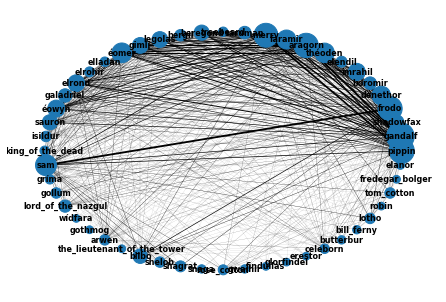

In [13]:
G = nx.Graph()
#nx.add_path(G,Characters)
NodesSize = list(OccurenceList.values()) # les occurences de chaque perso

G.add_nodes_from(OccurenceList.keys())


for (key1,key2) in CoocMatrix:
    G.add_edge(key1, key2, weight=CoocMatrix[key1,key2]/20) # 20 is just a constant to make the graph clearer
weights = [G[u][v]['weight'] for u,v in G.edges()]

nx.draw(G, 
        pos = nx.circular_layout(G), 
        node_size = [50 + x*10 for x in NodesSize],
        width=weights,
        font_size = 8,
        font_weight = 'bold',
        with_labels = True) 
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


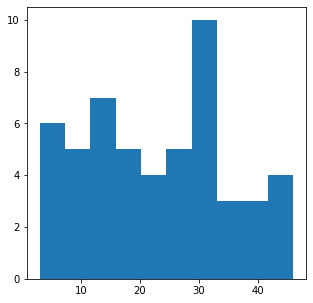

In [14]:
degrees = [val for (node, val) in G.degree()]
d1 = np.array((degrees))
fig2 = plt.hist(d1)

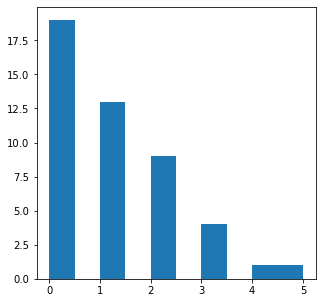

In [15]:
fig1 = plt.hist(nx.degree_histogram(G))

## Characters' count graph

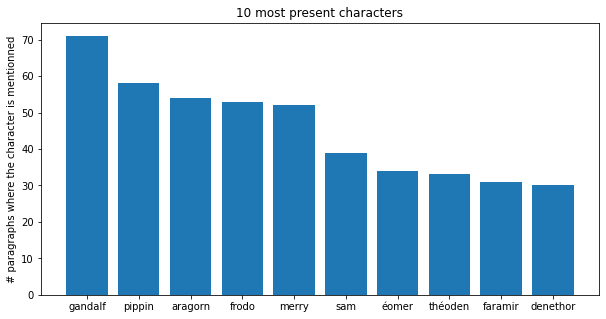

In [20]:
SortedCharOccurencesDic = (dict(sorted(OccurenceList.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedCharOccurencesDic.keys())[:10], height=list(SortedCharOccurencesDic.values())[:10] )
plt.title("10 most present characters")
plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

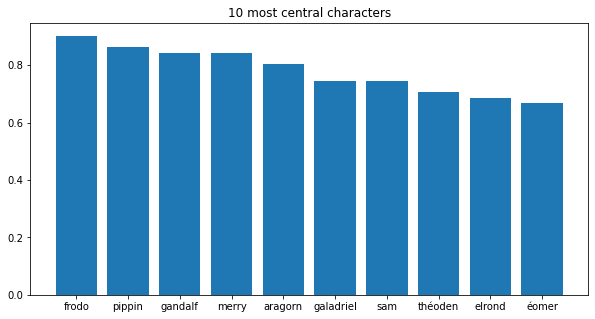

In [17]:
DegrCentr = nx.degree_centrality(G) # return a dictionnary

SortedDegrCentrDic = (dict(sorted(DegrCentr.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedDegrCentrDic.keys())[:10], height=list(SortedDegrCentrDic.values())[:10] )
plt.title("10 most central characters")
#plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

The degree centrality for a node v is the fraction of nodes it is connected to..
The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
The graph above is different from the previous graph because it measures the centrality of the characters by the number of unique links rather than naive links count.
More on that on https://www.sciencedirect.com/topics/computer-science/degree-centrality 

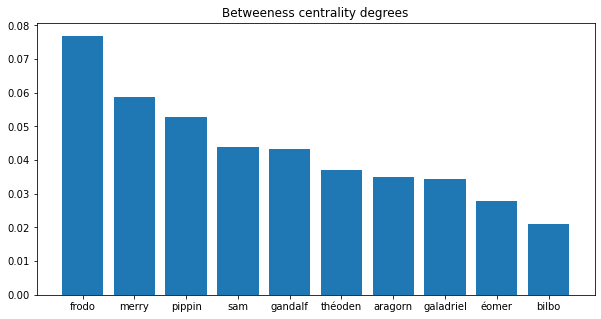

In [18]:
BtwnessCentralityDict = nx.betweenness_centrality(G)
SortedBtwnessCentralityDict= (dict(sorted(BtwnessCentralityDict.items(), key=lambda item: item[1], reverse=True)))
plt.bar(x=list(SortedBtwnessCentralityDict.keys())[:10], height=list(SortedBtwnessCentralityDict.values())[:10] )
plt.title("Betweeness centrality degrees")
#plt.ylabel("# paragraphs where the character is mentionned")

plt.rcParams['figure.figsize'] = [10, 5]

This metric measures how important a node is to the shortest paths through the network.

# Communities detection

## Louvain Algorithm